In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [23]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Las variables que eliminaremos son "Time" ya que esta no es espicificada en la base de datos, y todos lo valores de tipo booleano ya que no arrojarian resultados que sean utilez en las tablas.

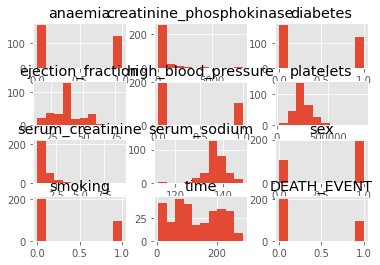

In [24]:
df.drop(['age'], axis='columns').hist()
plt.show()

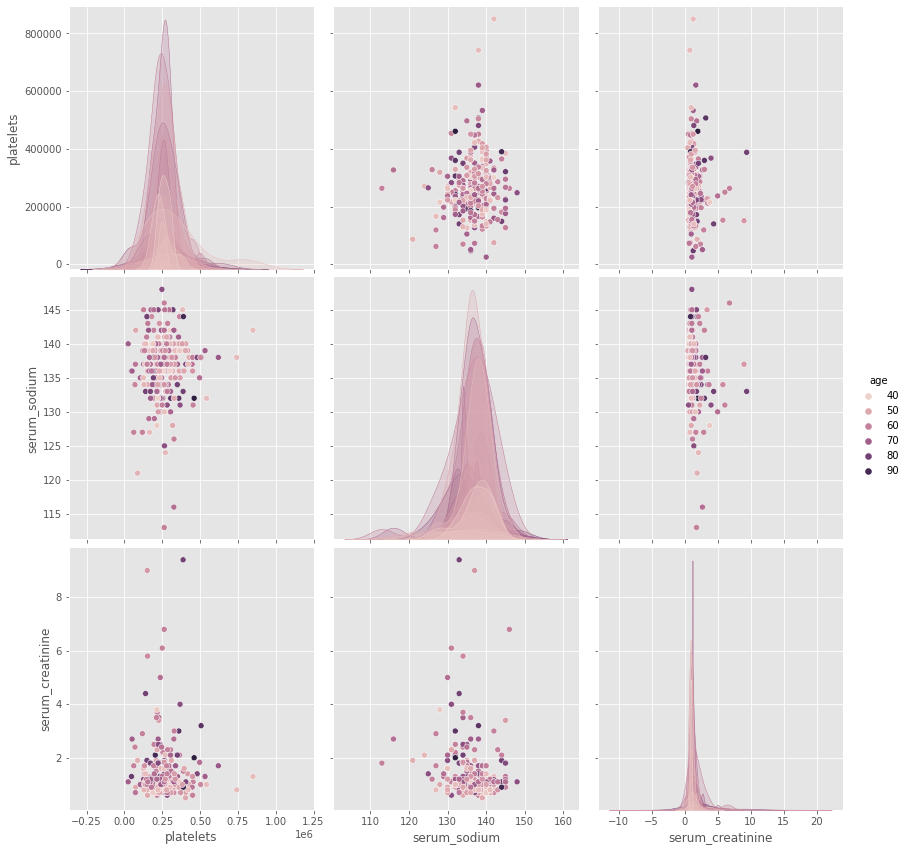

In [25]:
sb.pairplot(df.dropna(), hue='age', height=4, vars=["platelets","serum_sodium","serum_creatinine"], kind='scatter')

In [26]:
X = np.array(df[['platelets', 'serum_sodium', 'serum_creatinine']])
y = np.array(df['age'])
X[:10,:]

array([[2.6500000e+05, 1.3000000e+02, 1.9000000e+00],
       [2.6335803e+05, 1.3600000e+02, 1.1000000e+00],
       [1.6200000e+05, 1.2900000e+02, 1.3000000e+00],
       [2.1000000e+05, 1.3700000e+02, 1.9000000e+00],
       [3.2700000e+05, 1.1600000e+02, 2.7000000e+00],
       [2.0400000e+05, 1.3200000e+02, 2.1000000e+00],
       [1.2700000e+05, 1.3700000e+02, 1.2000000e+00],
       [4.5400000e+05, 1.3100000e+02, 1.1000000e+00],
       [2.6335803e+05, 1.3800000e+02, 1.5000000e+00],
       [3.8800000e+05, 1.3300000e+02, 9.4000000e+00]])

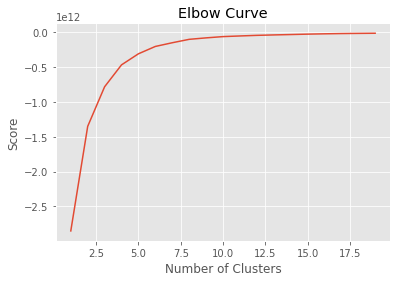

In [27]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

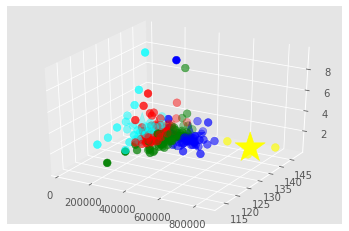

In [33]:
kmeans = KMeans(n_clusters=5).fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan','yellow']
assign=[]
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

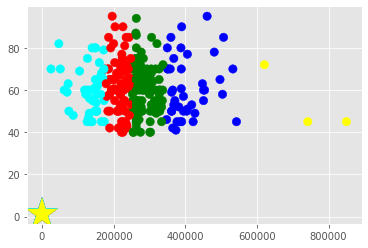

In [37]:
f1 = df['platelets'].values
f2 = df['age'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

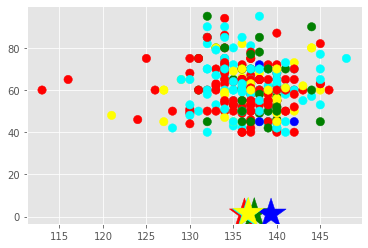

In [ ]:
f1 = df['serum_sodium'].values
f2 = df['age'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

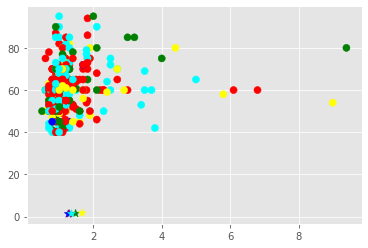

In [18]:
f1 = df['serum_creatinine'].values
f2 = df['age'].values

plt.scatter(f1, f2, c=assign, s=50)
plt.scatter(C[:, 2], C[:, 2], marker='*', c=colors, s=70)
plt.show()